In [1]:
from util import  *
import matplotlib.pyplot as plt
import seaborn as ses

In [2]:
train_all = load_train()
test_all = load_testA()
shop_all = load_shop_info()

In [3]:
mall_id = "m_7523"
train = train_all[train_all.mall_id == mall_id]
test = test_all[test_all.mall_id == mall_id]
shop = shop_all[shop_all.mall_id == mall_id]
shop.shape

(80, 6)

In [4]:
preprocess_basic_wifi(train)
preprocess_basic_wifi(test)
train.reset_index(inplace=True)
preprocess_basic_time(train)
preprocess_basic_time(test)
train["dayofyear"] = train.dt.dt.dayofyear
test["dayofyear"] = test.dt.dt.dayofyear

/usr/lib64/python2.7/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib64/python2.7/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [221]:
ud = train.groupby(["user_id", "dayofyear"])["shop_id"].count().reset_index()
ud = ud[ud.shop_id >=2]

In [267]:
shops_cor_one_day = {}
def corr_analyse(x, train, shops_cor_one_day): # 一天交易多次， 去某个商店在同一天可能去哪些商店
    shopids = train[(train.user_id == x[0]) & (train.dayofyear == x[1])]["shop_id"].values
    for _i,_s in enumerate(shopids):
        for _j,_s2 in enumerate(shopids):
            if _i == _j:
                continue
            else:
                if _s not in shops_cor_one_day:
                    shops_cor_one_day[_s] = {}
                if _s2 not in shops_cor_one_day[_s]:
                    shops_cor_one_day[_s][_s2] = 0
                shops_cor_one_day[_s][_s2] += 1
    
_ = map(lambda x:corr_analyse(x,train, shops_cor_one_day),ud[["user_id", "dayofyear"]].values)

In [268]:
shops_cor_one_day

{'s_1346456': {'s_1346456': 12,
  's_2939231': 1,
  's_3738103': 1,
  's_506597': 1,
  's_508287': 4,
  's_515010': 1},
 's_1392063': {'s_1392063': 2,
  's_3827392': 2,
  's_506646': 1,
  's_508287': 1,
  's_509630': 1,
  's_515010': 2,
  's_525779': 3,
  's_570869': 2},
 's_1452940': {'s_1452940': 212},
 's_1944816': {'s_1944816': 62,
  's_2257337': 2,
  's_2939231': 6,
  's_3726779': 5,
  's_3727061': 1,
  's_3759545': 1,
  's_3818635': 2,
  's_3833950': 1,
  's_3902873': 1,
  's_3907298': 1,
  's_4009954': 4,
  's_490562': 1,
  's_491277': 1,
  's_515010': 1,
  's_522897': 2,
  's_856830': 2},
 's_1997293': {'s_3726779': 1,
  's_3779904': 1,
  's_508287': 1,
  's_819792': 3,
  's_856830': 1},
 's_2257337': {'s_1944816': 2,
  's_2257337': 26,
  's_2939231': 9,
  's_3726779': 1,
  's_4009954': 5,
  's_510334': 1},
 's_2423948': {'s_2423948': 24,
  's_433337': 1,
  's_497803': 2,
  's_506597': 3,
  's_508287': 11,
  's_515010': 3,
  's_517795': 1,
  's_525418': 1,
  's_856830': 1},
 's

In [278]:
# 按hour 对最可能去的商店进行排序
ht = train.groupby(["shop_id","hour"])["longitude"].count().reset_index().sort_values(["hour","longitude"])

In [279]:
ht[ht.hour==18]

,shop_id,hour,longitude
82,s_2631847,18,1
135,s_2956845,18,1
429,s_496413,18,1
188,s_3643138,18,2
346,s_3939053,18,2
351,s_4005274,18,2
680,s_528553,18,2
198,s_3644057,18,3
329,s_3904425,18,3
267,s_3759545,18,4


array(['u_9786074', 'u_41613680', 'u_22748240', 'u_27283044', 'u_43589205',
       'u_29363313', 'u_39213690', 'u_20742137', 'u_10001910',
       'u_26415883', 'u_34328218', 'u_17488809', 'u_36722758',
       'u_35267427', 'u_48757774', 'u_37252148', 'u_32759766',
       'u_23357472', 'u_31312398', 'u_1327858', 'u_14535202', 'u_49256260',
       'u_7315238', 'u_58632447', 'u_2937782', 'u_16226597', 'u_58795352',
       'u_54067134', 'u_56058125', 'u_25859062', 'u_27009250',
       'u_38752262', 'u_18821685', 'u_46847182', 'u_10903353',
       'u_22328732', 'u_55084095'], dtype=object)

In [265]:
train["minute"] = train.dt.dt.minute
train["hour_minute"] = train.hour * 60 + train.minute
shops_cor_time = {}
def corr_analyse_in_time(x, train, shops_cor_one_day,time=30): # 一天交易多次， 去某个商店在time分钟内可能去哪些商店
    shopids = train[(train.user_id == x[0]) & (train.dayofyear == x[1])][["shop_id","hour_minute"]].values
    for _i,_s in enumerate(shopids):
        for _j,_s2 in enumerate(shopids):
            if _i == _j:
                continue
            else:
                if abs(_s[1] - _s2[1]) > time:
                    continue
                if _s[0] not in shops_cor_one_day:
                    shops_cor_one_day[_s[0]] = {}
                if _s2[0] not in shops_cor_one_day[_s[0]]:
                    shops_cor_one_day[_s[0]][_s2[0]] = 0
                shops_cor_one_day[_s[0]][_s2[0]] += 1
    
_ = map(lambda x:corr_analyse_in_time(x,train, shops_cor_time),ud[["user_id", "dayofyear"]].values)

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


['s_2939231' 460L] ['s_2939231' 730L]
['s_2939231' 730L] ['s_2939231' 460L]
['s_2939231' 470L] ['s_2939231' 730L]
['s_2939231' 730L] ['s_2939231' 470L]
['s_2939231' 710L] ['s_2939231' 470L]
['s_2939231' 470L] ['s_2939231' 710L]
['s_2939231' 460L] ['s_2939231' 1090L]
['s_2939231' 1090L] ['s_2939231' 460L]
['s_2939231' 660L] ['s_2939231' 470L]
['s_2939231' 470L] ['s_2939231' 660L]
['s_510334' 1210L] ['s_506646' 1150L]
['s_506646' 1150L] ['s_510334' 1210L]
['s_497803' 700L] ['s_3827392' 700L]
['s_3827392' 700L] ['s_497803' 700L]
['s_856830' 990L] ['s_627691' 1220L]
['s_627691' 1220L] ['s_856830' 990L]
['s_572085' 1220L] ['s_515010' 1120L]
['s_515010' 1120L] ['s_572085' 1220L]
['s_508287' 1150L] ['s_508287' 1140L]
['s_508287' 1140L] ['s_508287' 1150L]
['s_3907298' 1000L] ['s_856830' 980L]
['s_856830' 980L] ['s_3907298' 1000L]
['s_1392063' 1120L] ['s_515010' 1050L]
['s_1392063' 1120L] ['s_3827392' 1050L]
['s_515010' 1050L] ['s_1392063' 1120L]
['s_515010' 1050L] ['s_3827392' 1050L]
['s_38273

['s_506583' 1180L] ['s_506583' 1180L]
['s_506583' 1180L] ['s_506583' 1180L]
['s_506597' 1040L] ['s_4009954' 1020L]
['s_4009954' 1020L] ['s_506597' 1040L]
['s_4009954' 690L] ['s_3658709' 730L]
['s_3658709' 730L] ['s_4009954' 690L]
['s_3738103' 650L] ['s_506646' 800L]
['s_506646' 800L] ['s_3738103' 650L]
['s_506583' 750L] ['s_506583' 750L]
['s_506583' 750L] ['s_506583' 700L]
['s_506583' 750L] ['s_506583' 700L]
['s_506583' 750L] ['s_506583' 750L]
['s_506583' 750L] ['s_506583' 700L]
['s_506583' 750L] ['s_506583' 700L]
['s_506583' 700L] ['s_506583' 750L]
['s_506583' 700L] ['s_506583' 750L]
['s_506583' 700L] ['s_506583' 700L]
['s_506583' 700L] ['s_506583' 750L]
['s_506583' 700L] ['s_506583' 750L]
['s_506583' 700L] ['s_506583' 700L]
['s_510334' 1290L] ['s_525779' 900L]
['s_525779' 900L] ['s_510334' 1290L]
['s_517764' 1110L] ['s_517764' 1120L]
['s_517764' 1120L] ['s_517764' 1110L]
['s_508287' 800L] ['s_501724' 790L]
['s_501724' 790L] ['s_508287' 800L]
['s_2939231' 830L] ['s_2939231' 850L]
['s_

['s_491277' 850L] ['s_491277' 840L]
['s_491277' 850L] ['s_491277' 840L]
['s_2939231' 760L] ['s_2939231' 1080L]
['s_2939231' 1080L] ['s_2939231' 760L]
['s_506583' 1080L] ['s_506583' 1080L]
['s_506583' 1080L] ['s_506583' 1080L]
['s_517764' 840L] ['s_3818635' 670L]
['s_3818635' 670L] ['s_517764' 840L]
['s_433337' 1240L] ['s_433337' 1230L]
['s_433337' 1230L] ['s_433337' 1240L]
['s_508287' 1230L] ['s_540782' 1220L]
['s_540782' 1220L] ['s_508287' 1230L]
['s_509630' 760L] ['s_508287' 750L]
['s_508287' 750L] ['s_509630' 760L]
['s_3622929' 710L] ['s_491277' 720L]
['s_491277' 720L] ['s_3622929' 710L]
['s_856830' 1290L] ['s_525779' 1250L]
['s_525779' 1250L] ['s_856830' 1290L]
['s_508287' 690L] ['s_3726779' 650L]
['s_3726779' 650L] ['s_508287' 690L]
['s_1944816' 720L] ['s_2939231' 720L]
['s_2939231' 720L] ['s_1944816' 720L]
['s_4009954' 750L] ['s_819792' 730L]
['s_819792' 730L] ['s_4009954' 750L]
['s_517764' 1070L] ['s_517764' 1090L]
['s_517764' 1090L] ['s_517764' 1070L]
['s_643862' 710L] ['s_5070

['s_525418' 870L] ['s_525418' 890L]
['s_525418' 890L] ['s_525418' 870L]
['s_508287' 1070L] ['s_506597' 1090L]
['s_506597' 1090L] ['s_508287' 1070L]
['s_2939231' 1130L] ['s_2939231' 1170L]
['s_2939231' 1130L] ['s_2939231' 1130L]
['s_2939231' 1130L] ['s_2939231' 1170L]
['s_2939231' 1170L] ['s_2939231' 1130L]
['s_2939231' 1170L] ['s_2939231' 1130L]
['s_2939231' 1170L] ['s_2939231' 1170L]
['s_2939231' 1130L] ['s_2939231' 1130L]
['s_2939231' 1130L] ['s_2939231' 1170L]
['s_2939231' 1130L] ['s_2939231' 1170L]
['s_2939231' 1170L] ['s_2939231' 1130L]
['s_2939231' 1170L] ['s_2939231' 1170L]
['s_2939231' 1170L] ['s_2939231' 1130L]
['s_522897' 840L] ['s_627691' 1170L]
['s_627691' 1170L] ['s_522897' 840L]
['s_643862' 650L] ['s_643862' 650L]
['s_643862' 650L] ['s_643862' 650L]
['s_515010' 1070L] ['s_3827392' 1070L]
['s_515010' 1070L] ['s_508287' 1080L]
['s_3827392' 1070L] ['s_515010' 1070L]
['s_3827392' 1070L] ['s_508287' 1080L]
['s_508287' 1080L] ['s_515010' 1070L]
['s_508287' 1080L] ['s_3827392' 1

['s_3726779' 1270L] ['s_4009954' 1280L]
['s_2939231' 1120L] ['s_2939231' 1140L]
['s_2939231' 1140L] ['s_2939231' 1120L]
['s_856830' 730L] ['s_856830' 740L]
['s_856830' 740L] ['s_856830' 730L]
['s_3622929' 740L] ['s_643862' 700L]
['s_643862' 700L] ['s_3622929' 740L]
['s_3726779' 1110L] ['s_4009954' 1120L]
['s_4009954' 1120L] ['s_3726779' 1110L]
['s_3907298' 1190L] ['s_3907298' 1150L]
['s_3907298' 1150L] ['s_3907298' 1190L]
['s_508287' 630L] ['s_508287' 620L]
['s_508287' 620L] ['s_508287' 630L]
['s_2939231' 460L] ['s_2939231' 1070L]
['s_2939231' 460L] ['s_2939231' 1080L]
['s_2939231' 1070L] ['s_2939231' 460L]
['s_2939231' 1070L] ['s_2939231' 1080L]
['s_2939231' 1080L] ['s_2939231' 460L]
['s_2939231' 1080L] ['s_2939231' 1070L]
['s_627691' 740L] ['s_627691' 760L]
['s_627691' 760L] ['s_627691' 740L]
['s_627691' 750L] ['s_627691' 740L]
['s_627691' 740L] ['s_627691' 750L]
['s_525418' 1100L] ['s_508287' 1080L]
['s_525418' 1100L] ['s_508287' 1080L]
['s_508287' 1080L] ['s_525418' 1100L]
['s_5082

['s_621251' 960L] ['s_621251' 850L]
['s_621251' 960L] ['s_2939231' 410L]
['s_621251' 850L] ['s_621251' 960L]
['s_621251' 850L] ['s_2939231' 410L]
['s_2939231' 410L] ['s_621251' 960L]
['s_2939231' 410L] ['s_621251' 850L]
['s_627691' 1160L] ['s_627691' 1120L]
['s_627691' 1160L] ['s_627691' 1130L]
['s_627691' 1120L] ['s_627691' 1160L]
['s_627691' 1120L] ['s_627691' 1130L]
['s_627691' 1130L] ['s_627691' 1160L]
['s_627691' 1130L] ['s_627691' 1120L]
['s_491277' 880L] ['s_3759545' 970L]
['s_3759545' 970L] ['s_491277' 880L]
['s_3833950' 1020L] ['s_3833950' 1020L]
['s_3833950' 1020L] ['s_3833950' 1020L]
['s_3833950' 1020L] ['s_3833950' 1020L]
['s_3833950' 1020L] ['s_3833950' 1020L]
['s_3833950' 1020L] ['s_3833950' 1020L]
['s_3833950' 1020L] ['s_3833950' 1020L]
['s_3833950' 1020L] ['s_3833950' 1020L]
['s_3833950' 1020L] ['s_3833950' 1020L]
['s_3833950' 1020L] ['s_3833950' 1020L]
['s_3833950' 1020L] ['s_3833950' 1020L]
['s_3833950' 1020L] ['s_3833950' 1020L]
['s_3833950' 1020L] ['s_3833950' 1020L

['s_508287' 1080L] ['s_792077' 1160L]
['s_792077' 1160L] ['s_506597' 1070L]
['s_792077' 1160L] ['s_508287' 1080L]
['s_570869' 1090L] ['s_542833' 1100L]
['s_542833' 1100L] ['s_570869' 1090L]
['s_3622929' 970L] ['s_491277' 880L]
['s_491277' 880L] ['s_3622929' 970L]
['s_504009' 1140L] ['s_515010' 1110L]
['s_504009' 1140L] ['s_3827392' 1110L]
['s_515010' 1110L] ['s_504009' 1140L]
['s_515010' 1110L] ['s_3827392' 1110L]
['s_3827392' 1110L] ['s_504009' 1140L]
['s_3827392' 1110L] ['s_515010' 1110L]
['s_856830' 950L] ['s_1997293' 1200L]
['s_1997293' 1200L] ['s_856830' 950L]
['s_4009954' 1230L] ['s_819792' 1190L]
['s_819792' 1190L] ['s_4009954' 1230L]
['s_3658709' 1230L] ['s_3622929' 1220L]
['s_3658709' 1230L] ['s_3622929' 820L]
['s_3658709' 1230L] ['s_3622929' 1220L]
['s_3658709' 1230L] ['s_3622929' 820L]
['s_3658709' 1230L] ['s_4009954' 740L]
['s_3622929' 1220L] ['s_3658709' 1230L]
['s_3622929' 1220L] ['s_3622929' 820L]
['s_3622929' 1220L] ['s_3622929' 1220L]
['s_3622929' 1220L] ['s_3622929' 8

['s_1944816' 740L] ['s_3818635' 1120L]
['s_508287' 710L] ['s_1346456' 770L]
['s_1346456' 770L] ['s_508287' 710L]
['s_627691' 710L] ['s_508287' 690L]
['s_508287' 690L] ['s_627691' 710L]
['s_2939231' 700L] ['s_2939231' 700L]
['s_2939231' 700L] ['s_2939231' 700L]
['s_856830' 1120L] ['s_856830' 1140L]
['s_856830' 1140L] ['s_856830' 1120L]
['s_4009954' 1140L] ['s_1944816' 1140L]
['s_1944816' 1140L] ['s_4009954' 1140L]
['s_3726779' 1110L] ['s_819792' 1080L]
['s_819792' 1080L] ['s_3726779' 1110L]
['s_2257337' 1230L] ['s_2257337' 1230L]
['s_2257337' 1230L] ['s_2257337' 1230L]
['s_515753' 1250L] ['s_515753' 1320L]
['s_515753' 1250L] ['s_515753' 780L]
['s_515753' 1250L] ['s_515753' 1250L]
['s_515753' 1250L] ['s_515753' 1150L]
['s_515753' 1250L] ['s_515753' 1190L]
['s_515753' 1250L] ['s_515753' 1190L]
['s_515753' 1250L] ['s_515753' 1300L]
['s_515753' 1250L] ['s_515753' 1300L]
['s_515753' 1250L] ['s_515753' 1090L]
['s_515753' 1250L] ['s_515753' 1340L]
['s_515753' 1250L] ['s_515753' 1210L]
['s_5157

['s_515753' 1200L] ['s_515753' 1190L]
['s_515753' 1200L] ['s_515753' 1300L]
['s_515753' 1200L] ['s_515753' 1300L]
['s_515753' 1200L] ['s_515753' 1090L]
['s_515753' 1200L] ['s_515753' 1340L]
['s_515753' 1200L] ['s_515753' 1210L]
['s_515753' 1200L] ['s_515753' 1200L]
['s_515753' 1200L] ['s_515753' 1320L]
['s_515753' 1200L] ['s_515753' 1320L]
['s_515753' 1200L] ['s_515753' 1170L]
['s_515753' 1200L] ['s_515753' 1300L]
['s_1944816' 870L] ['s_522897' 1230L]
['s_522897' 1230L] ['s_1944816' 870L]
['s_627691' 800L] ['s_506646' 790L]
['s_506646' 790L] ['s_627691' 800L]
['s_2939231' 830L] ['s_2939231' 970L]
['s_2939231' 970L] ['s_2939231' 830L]
['s_2939231' 790L] ['s_856830' 1260L]
['s_856830' 1260L] ['s_2939231' 790L]
['s_2939231' 770L] ['s_2939231' 770L]
['s_2939231' 770L] ['s_2939231' 760L]
['s_2939231' 770L] ['s_2939231' 770L]
['s_2939231' 770L] ['s_2939231' 760L]
['s_2939231' 770L] ['s_2939231' 770L]
['s_2939231' 770L] ['s_2939231' 760L]
['s_2939231' 770L] ['s_2939231' 760L]
['s_2939231' 770

['s_3726779' 1040L] ['s_3726779' 1040L]
['s_3726779' 1040L] ['s_3726779' 1040L]
['s_3726779' 1020L] ['s_525779' 930L]
['s_3726779' 1020L] ['s_506646' 930L]
['s_525779' 930L] ['s_3726779' 1020L]
['s_525779' 930L] ['s_506646' 930L]
['s_506646' 930L] ['s_3726779' 1020L]
['s_506646' 930L] ['s_525779' 930L]
['s_497803' 950L] ['s_497803' 960L]
['s_497803' 950L] ['s_525779' 940L]
['s_497803' 950L] ['s_506646' 940L]
['s_497803' 960L] ['s_497803' 950L]
['s_497803' 960L] ['s_525779' 940L]
['s_497803' 960L] ['s_506646' 940L]
['s_525779' 940L] ['s_497803' 950L]
['s_525779' 940L] ['s_497803' 960L]
['s_525779' 940L] ['s_506646' 940L]
['s_506646' 940L] ['s_497803' 950L]
['s_506646' 940L] ['s_497803' 960L]
['s_506646' 940L] ['s_525779' 940L]
['s_2939231' 690L] ['s_2939231' 1110L]
['s_2939231' 1110L] ['s_2939231' 690L]
['s_2939231' 1190L] ['s_2939231' 750L]
['s_2939231' 750L] ['s_2939231' 1190L]
['s_2939231' 1150L] ['s_2939231' 750L]
['s_2939231' 750L] ['s_2939231' 1150L]
['s_2939231' 1170L] ['s_293923

['s_525418' 1040L] ['s_490562' 840L]
['s_490562' 840L] ['s_525418' 1040L]
['s_2939231' 460L] ['s_2939231' 1050L]
['s_2939231' 1050L] ['s_2939231' 460L]
['s_525418' 1020L] ['s_525418' 800L]
['s_525418' 1020L] ['s_525418' 800L]
['s_525418' 800L] ['s_525418' 1020L]
['s_525418' 800L] ['s_525418' 800L]
['s_525418' 800L] ['s_525418' 1020L]
['s_525418' 800L] ['s_525418' 800L]
['s_792077' 1080L] ['s_506646' 1080L]
['s_792077' 1080L] ['s_506646' 1000L]
['s_506646' 1080L] ['s_792077' 1080L]
['s_506646' 1080L] ['s_506646' 1000L]
['s_506646' 1000L] ['s_792077' 1080L]
['s_506646' 1000L] ['s_506646' 1080L]
['s_508287' 760L] ['s_508287' 740L]
['s_508287' 740L] ['s_508287' 760L]
['s_2257337' 780L] ['s_2939231' 1120L]
['s_2939231' 1120L] ['s_2257337' 780L]
['s_501724' 1210L] ['s_506597' 910L]
['s_501724' 1210L] ['s_506597' 920L]
['s_506597' 910L] ['s_501724' 1210L]
['s_506597' 910L] ['s_506597' 920L]
['s_506597' 920L] ['s_501724' 1210L]
['s_506597' 920L] ['s_506597' 910L]
['s_517764' 1160L] ['s_508287'

['s_2939231' 520L] ['s_2939231' 530L]
['s_2939231' 530L] ['s_2939231' 520L]
['s_508287' 720L] ['s_627691' 790L]
['s_508287' 720L] ['s_627691' 820L]
['s_627691' 790L] ['s_508287' 720L]
['s_627691' 790L] ['s_627691' 820L]
['s_627691' 820L] ['s_508287' 720L]
['s_627691' 820L] ['s_627691' 790L]
['s_497803' 930L] ['s_517764' 930L]
['s_517764' 930L] ['s_497803' 930L]
['s_497803' 1090L] ['s_508287' 1090L]
['s_508287' 1090L] ['s_497803' 1090L]
['s_506597' 740L] ['s_856830' 620L]
['s_856830' 620L] ['s_506597' 740L]
['s_433337' 970L] ['s_433337' 980L]
['s_433337' 980L] ['s_433337' 970L]
['s_3827392' 780L] ['s_501724' 770L]
['s_501724' 770L] ['s_3827392' 780L]
['s_856830' 1000L] ['s_856830' 990L]
['s_856830' 1000L] ['s_856830' 990L]
['s_856830' 1000L] ['s_856830' 1000L]
['s_856830' 990L] ['s_856830' 1000L]
['s_856830' 990L] ['s_856830' 990L]
['s_856830' 990L] ['s_856830' 1000L]
['s_856830' 990L] ['s_856830' 1000L]
['s_856830' 990L] ['s_856830' 990L]
['s_856830' 990L] ['s_856830' 1000L]
['s_856830

['s_2423948' 1230L] ['s_2423948' 1260L]
['s_2423948' 1260L] ['s_2423948' 1230L]
['s_525779' 760L] ['s_508287' 830L]
['s_508287' 830L] ['s_525779' 760L]
['s_517764' 1070L] ['s_517764' 1070L]
['s_517764' 1070L] ['s_517764' 1070L]
['s_508287' 1060L] ['s_508287' 1080L]
['s_508287' 1080L] ['s_508287' 1060L]
['s_4009954' 830L] ['s_4009954' 830L]
['s_4009954' 830L] ['s_4009954' 800L]
['s_4009954' 830L] ['s_4009954' 800L]
['s_4009954' 830L] ['s_517764' 830L]
['s_4009954' 830L] ['s_517764' 830L]
['s_4009954' 830L] ['s_517764' 840L]
['s_4009954' 830L] ['s_517764' 840L]
['s_4009954' 830L] ['s_4009954' 830L]
['s_4009954' 830L] ['s_4009954' 800L]
['s_4009954' 830L] ['s_4009954' 800L]
['s_4009954' 830L] ['s_517764' 830L]
['s_4009954' 830L] ['s_517764' 830L]
['s_4009954' 830L] ['s_517764' 840L]
['s_4009954' 830L] ['s_517764' 840L]
['s_4009954' 800L] ['s_4009954' 830L]
['s_4009954' 800L] ['s_4009954' 830L]
['s_4009954' 800L] ['s_4009954' 800L]
['s_4009954' 800L] ['s_517764' 830L]
['s_4009954' 800L] ['

['s_525418' 700L] ['s_643862' 630L]
['s_643862' 630L] ['s_525418' 700L]
['s_3738103' 1060L] ['s_504009' 1070L]
['s_504009' 1070L] ['s_3738103' 1060L]
['s_1944816' 780L] ['s_856830' 970L]
['s_856830' 970L] ['s_1944816' 780L]
['s_856830' 1230L] ['s_856830' 1230L]
['s_856830' 1230L] ['s_2939231' 450L]
['s_856830' 1230L] ['s_856830' 1230L]
['s_856830' 1230L] ['s_2939231' 450L]
['s_2939231' 450L] ['s_856830' 1230L]
['s_2939231' 450L] ['s_856830' 1230L]
['s_627691' 1250L] ['s_627691' 1160L]
['s_627691' 1160L] ['s_627691' 1250L]
['s_3827392' 820L] ['s_501724' 890L]
['s_501724' 890L] ['s_3827392' 820L]
['s_433337' 1080L] ['s_433337' 1080L]
['s_433337' 1080L] ['s_433337' 1080L]
['s_856830' 1260L] ['s_856830' 1250L]
['s_856830' 1250L] ['s_856830' 1260L]
['s_542833' 680L] ['s_542833' 680L]
['s_542833' 680L] ['s_542833' 680L]
['s_2939231' 1080L] ['s_2939231' 430L]
['s_2939231' 430L] ['s_2939231' 1080L]
['s_3738103' 1220L] ['s_3738103' 1220L]
['s_3738103' 1220L] ['s_3738103' 1220L]
['s_517764' 1120

['s_627691' 1100L] ['s_508287' 1080L]
['s_508287' 1080L] ['s_627691' 1100L]
['s_510334' 1190L] ['s_510334' 1180L]
['s_510334' 1180L] ['s_510334' 1190L]
['s_1392063' 750L] ['s_525779' 760L]
['s_1392063' 750L] ['s_525779' 770L]
['s_525779' 760L] ['s_1392063' 750L]
['s_525779' 760L] ['s_525779' 770L]
['s_525779' 770L] ['s_1392063' 750L]
['s_525779' 770L] ['s_525779' 760L]
['s_506583' 1070L] ['s_506583' 1070L]
['s_506583' 1070L] ['s_506583' 1070L]
['s_3726779' 810L] ['s_4009954' 810L]
['s_4009954' 810L] ['s_3726779' 810L]
['s_506583' 700L] ['s_506583' 700L]
['s_506583' 700L] ['s_506583' 700L]
['s_506597' 730L] ['s_506597' 740L]
['s_506597' 740L] ['s_506597' 730L]
['s_1944816' 1080L] ['s_1944816' 1080L]
['s_1944816' 1080L] ['s_1944816' 1080L]
['s_508287' 850L] ['s_627691' 860L]
['s_627691' 860L] ['s_508287' 850L]
['s_3818635' 1120L] ['s_508287' 760L]
['s_3818635' 1120L] ['s_3827392' 1120L]
['s_3818635' 1120L] ['s_3827392' 1120L]
['s_3818635' 1120L] ['s_3827392' 850L]
['s_3818635' 1120L] ['s

['s_2691361' 1140L] ['s_3726779' 1170L]
['s_506583' 670L] ['s_506583' 670L]
['s_506583' 670L] ['s_506583' 670L]
['s_856830' 1190L] ['s_856830' 1200L]
['s_856830' 1190L] ['s_792077' 1280L]
['s_856830' 1200L] ['s_856830' 1190L]
['s_856830' 1200L] ['s_792077' 1280L]
['s_792077' 1280L] ['s_856830' 1190L]
['s_792077' 1280L] ['s_856830' 1200L]
['s_627691' 790L] ['s_627691' 770L]
['s_627691' 790L] ['s_643862' 630L]
['s_627691' 770L] ['s_627691' 790L]
['s_627691' 770L] ['s_643862' 630L]
['s_643862' 630L] ['s_627691' 790L]
['s_643862' 630L] ['s_627691' 770L]
['s_506597' 910L] ['s_540782' 1100L]
['s_540782' 1100L] ['s_506597' 910L]
['s_525418' 1170L] ['s_525418' 1180L]
['s_525418' 1180L] ['s_525418' 1170L]
['s_819792' 690L] ['s_819792' 700L]
['s_819792' 700L] ['s_819792' 690L]
['s_515753' 700L] ['s_433337' 630L]
['s_433337' 630L] ['s_515753' 700L]
['s_508287' 860L] ['s_508287' 860L]
['s_508287' 860L] ['s_508287' 860L]
['s_508287' 860L] ['s_508287' 860L]
['s_508287' 860L] ['s_508287' 860L]
['s_50

['s_508287' 830L] ['s_508287' 820L]
['s_508287' 820L] ['s_508287' 830L]
['s_1944816' 1020L] ['s_1944816' 1000L]
['s_1944816' 1020L] ['s_1944816' 750L]
['s_1944816' 1000L] ['s_1944816' 1020L]
['s_1944816' 1000L] ['s_1944816' 750L]
['s_1944816' 750L] ['s_1944816' 1020L]
['s_1944816' 750L] ['s_1944816' 1000L]
['s_2939231' 1160L] ['s_2939231' 760L]
['s_2939231' 760L] ['s_2939231' 1160L]
['s_2257337' 1170L] ['s_2257337' 1170L]
['s_2257337' 1170L] ['s_2257337' 1170L]
['s_508287' 670L] ['s_508287' 700L]
['s_508287' 700L] ['s_508287' 670L]
['s_627691' 1130L] ['s_627691' 1130L]
['s_627691' 1130L] ['s_515010' 1160L]
['s_627691' 1130L] ['s_515010' 1160L]
['s_627691' 1130L] ['s_627691' 1130L]
['s_627691' 1130L] ['s_515010' 1160L]
['s_627691' 1130L] ['s_515010' 1160L]
['s_515010' 1160L] ['s_627691' 1130L]
['s_515010' 1160L] ['s_627691' 1130L]
['s_515010' 1160L] ['s_515010' 1160L]
['s_515010' 1160L] ['s_627691' 1130L]
['s_515010' 1160L] ['s_627691' 1130L]
['s_515010' 1160L] ['s_515010' 1160L]
['s_51

['s_3726779' 1260L] ['s_570869' 1240L]
['s_570869' 1240L] ['s_3726779' 1260L]
['s_572085' 1090L] ['s_506597' 970L]
['s_572085' 1090L] ['s_515010' 970L]
['s_572085' 1090L] ['s_506597' 990L]
['s_572085' 1090L] ['s_508287' 960L]
['s_572085' 1090L] ['s_508287' 960L]
['s_506597' 970L] ['s_572085' 1090L]
['s_506597' 970L] ['s_515010' 970L]
['s_506597' 970L] ['s_506597' 990L]
['s_506597' 970L] ['s_508287' 960L]
['s_506597' 970L] ['s_508287' 960L]
['s_515010' 970L] ['s_572085' 1090L]
['s_515010' 970L] ['s_506597' 970L]
['s_515010' 970L] ['s_506597' 990L]
['s_515010' 970L] ['s_508287' 960L]
['s_515010' 970L] ['s_508287' 960L]
['s_506597' 990L] ['s_572085' 1090L]
['s_506597' 990L] ['s_506597' 970L]
['s_506597' 990L] ['s_515010' 970L]
['s_506597' 990L] ['s_508287' 960L]
['s_506597' 990L] ['s_508287' 960L]
['s_508287' 960L] ['s_572085' 1090L]
['s_508287' 960L] ['s_506597' 970L]
['s_508287' 960L] ['s_515010' 970L]
['s_508287' 960L] ['s_506597' 990L]
['s_508287' 960L] ['s_508287' 960L]
['s_508287' 9

['s_2939231' 960L] ['s_2939231' 960L]
['s_2939231' 960L] ['s_2939231' 960L]
['s_509630' 780L] ['s_509630' 780L]
['s_509630' 780L] ['s_509630' 780L]
['s_525418' 850L] ['s_497803' 820L]
['s_497803' 820L] ['s_525418' 850L]
['s_2257337' 920L] ['s_2257337' 910L]
['s_2257337' 910L] ['s_2257337' 920L]
['s_506597' 1100L] ['s_506597' 1130L]
['s_506597' 1100L] ['s_506597' 1130L]
['s_506597' 1130L] ['s_506597' 1100L]
['s_506597' 1130L] ['s_506597' 1130L]
['s_506597' 1130L] ['s_506597' 1100L]
['s_506597' 1130L] ['s_506597' 1130L]
['s_501724' 1080L] ['s_2939231' 750L]
['s_501724' 1080L] ['s_506597' 1080L]
['s_2939231' 750L] ['s_501724' 1080L]
['s_2939231' 750L] ['s_506597' 1080L]
['s_506597' 1080L] ['s_501724' 1080L]
['s_506597' 1080L] ['s_2939231' 750L]
['s_643862' 1080L] ['s_504009' 770L]
['s_504009' 770L] ['s_643862' 1080L]
['s_506583' 750L] ['s_506583' 760L]
['s_506583' 760L] ['s_506583' 750L]
['s_517764' 700L] ['s_525779' 740L]
['s_525779' 740L] ['s_517764' 700L]
['s_2423948' 770L] ['s_2423948

['s_506597' 790L] ['s_506597' 790L]
['s_506597' 960L] ['s_508287' 950L]
['s_508287' 950L] ['s_506597' 960L]
['s_508287' 1140L] ['s_3743937' 1120L]
['s_3743937' 1120L] ['s_508287' 1140L]
['s_627691' 800L] ['s_627691' 770L]
['s_627691' 770L] ['s_627691' 800L]
['s_856830' 1080L] ['s_856830' 1080L]
['s_856830' 1080L] ['s_856830' 1130L]
['s_856830' 1080L] ['s_856830' 1130L]
['s_856830' 1080L] ['s_2939231' 1130L]
['s_856830' 1080L] ['s_856830' 1080L]
['s_856830' 1080L] ['s_856830' 1130L]
['s_856830' 1080L] ['s_856830' 1130L]
['s_856830' 1080L] ['s_2939231' 1130L]
['s_856830' 1130L] ['s_856830' 1080L]
['s_856830' 1130L] ['s_856830' 1080L]
['s_856830' 1130L] ['s_856830' 1130L]
['s_856830' 1130L] ['s_2939231' 1130L]
['s_856830' 1130L] ['s_856830' 1080L]
['s_856830' 1130L] ['s_856830' 1080L]
['s_856830' 1130L] ['s_856830' 1130L]
['s_856830' 1130L] ['s_2939231' 1130L]
['s_2939231' 1130L] ['s_856830' 1080L]
['s_2939231' 1130L] ['s_856830' 1080L]
['s_2939231' 1130L] ['s_856830' 1130L]
['s_2939231' 

['s_508287' 1150L] ['s_512700' 1230L]
['s_512700' 1230L] ['s_508287' 1150L]
['s_510334' 1320L] ['s_510225' 650L]
['s_510334' 1320L] ['s_510225' 670L]
['s_510225' 650L] ['s_510334' 1320L]
['s_510225' 650L] ['s_510225' 670L]
['s_510225' 670L] ['s_510334' 1320L]
['s_510225' 670L] ['s_510225' 650L]
['s_501724' 850L] ['s_501724' 850L]
['s_501724' 850L] ['s_501724' 850L]
['s_3833950' 1230L] ['s_2939231' 770L]
['s_2939231' 770L] ['s_3833950' 1230L]
['s_1944816' 980L] ['s_1944816' 960L]
['s_1944816' 960L] ['s_1944816' 980L]
['s_490562' 980L] ['s_490562' 880L]
['s_490562' 980L] ['s_490562' 880L]
['s_490562' 980L] ['s_490562' 980L]
['s_490562' 880L] ['s_490562' 980L]
['s_490562' 880L] ['s_490562' 880L]
['s_490562' 880L] ['s_490562' 980L]
['s_490562' 880L] ['s_490562' 980L]
['s_490562' 880L] ['s_490562' 880L]
['s_490562' 880L] ['s_490562' 980L]
['s_490562' 980L] ['s_490562' 980L]
['s_490562' 980L] ['s_490562' 880L]
['s_490562' 980L] ['s_490562' 880L]
['s_508287' 1180L] ['s_627691' 1210L]
['s_6276

['s_433337' 1330L] ['s_433337' 1320L]
['s_433337' 1320L] ['s_433337' 1330L]
['s_506597' 820L] ['s_506597' 810L]
['s_506597' 810L] ['s_506597' 820L]
['s_506583' 820L] ['s_506583' 820L]
['s_506583' 820L] ['s_506583' 820L]
['s_508287' 730L] ['s_501724' 780L]
['s_501724' 780L] ['s_508287' 730L]
['s_510334' 800L] ['s_643862' 810L]
['s_643862' 810L] ['s_510334' 800L]
['s_2423948' 780L] ['s_508287' 850L]
['s_508287' 850L] ['s_2423948' 780L]
['s_512700' 1200L] ['s_643862' 1110L]
['s_643862' 1110L] ['s_512700' 1200L]
['s_508287' 750L] ['s_506597' 750L]
['s_506597' 750L] ['s_508287' 750L]
['s_3827392' 780L] ['s_506597' 770L]
['s_3827392' 780L] ['s_515010' 790L]
['s_506597' 770L] ['s_3827392' 780L]
['s_506597' 770L] ['s_515010' 790L]
['s_515010' 790L] ['s_3827392' 780L]
['s_515010' 790L] ['s_506597' 770L]
['s_2939231' 450L] ['s_2939231' 700L]
['s_2939231' 700L] ['s_2939231' 450L]
['s_501724' 880L] ['s_506597' 850L]
['s_506597' 850L] ['s_501724' 880L]
['s_627691' 1140L] ['s_627691' 1130L]
['s_6276

['s_2939231' 520L] ['s_2939231' 520L]
['s_2939231' 520L] ['s_2939231' 520L]
['s_509630' 780L] ['s_501724' 870L]
['s_501724' 870L] ['s_509630' 780L]
['s_4009954' 740L] ['s_3727061' 730L]
['s_3727061' 730L] ['s_4009954' 740L]
['s_506583' 1160L] ['s_506583' 1290L]
['s_506583' 1160L] ['s_506583' 1160L]
['s_506583' 1160L] ['s_506583' 1290L]
['s_506583' 1290L] ['s_506583' 1160L]
['s_506583' 1290L] ['s_506583' 1160L]
['s_506583' 1290L] ['s_506583' 1290L]
['s_506583' 1160L] ['s_506583' 1160L]
['s_506583' 1160L] ['s_506583' 1290L]
['s_506583' 1160L] ['s_506583' 1290L]
['s_506583' 1290L] ['s_506583' 1160L]
['s_506583' 1290L] ['s_506583' 1290L]
['s_506583' 1290L] ['s_506583' 1160L]
['s_508287' 790L] ['s_506597' 790L]
['s_506597' 790L] ['s_508287' 790L]
['s_2939231' 370L] ['s_2939231' 370L]
['s_2939231' 370L] ['s_2939231' 370L]
['s_3644057' 840L] ['s_621251' 1150L]
['s_621251' 1150L] ['s_3644057' 840L]
['s_856830' 750L] ['s_856830' 750L]
['s_856830' 750L] ['s_856830' 750L]
['s_497803' 960L] ['s_50

['s_506646' 1200L] ['s_643862' 1200L]
['s_506597' 1160L] ['s_508287' 1160L]
['s_508287' 1160L] ['s_506597' 1160L]
['s_2423948' 1170L] ['s_515010' 1190L]
['s_515010' 1190L] ['s_2423948' 1170L]
['s_517764' 1140L] ['s_517764' 1150L]
['s_517764' 1150L] ['s_517764' 1140L]
['s_433337' 720L] ['s_509630' 740L]
['s_509630' 740L] ['s_433337' 720L]
['s_510334' 1260L] ['s_525779' 1200L]
['s_525779' 1200L] ['s_510334' 1260L]
['s_627691' 1160L] ['s_508287' 1130L]
['s_508287' 1130L] ['s_627691' 1160L]
['s_512700' 1220L] ['s_515010' 1150L]
['s_512700' 1220L] ['s_515010' 1140L]
['s_515010' 1150L] ['s_512700' 1220L]
['s_515010' 1150L] ['s_515010' 1140L]
['s_515010' 1140L] ['s_512700' 1220L]
['s_515010' 1140L] ['s_515010' 1150L]
['s_515010' 1120L] ['s_508287' 1120L]
['s_508287' 1120L] ['s_515010' 1120L]
['s_515010' 1090L] ['s_508287' 1080L]
['s_508287' 1080L] ['s_515010' 1090L]
['s_512700' 1110L] ['s_512700' 1110L]
['s_512700' 1110L] ['s_512700' 1150L]
['s_512700' 1110L] ['s_512700' 1150L]
['s_512700' 11

['s_2939231' 1040L] ['s_517764' 670L]
['s_517764' 670L] ['s_2939231' 1040L]
['s_2939231' 760L] ['s_856830' 660L]
['s_856830' 660L] ['s_2939231' 760L]
['s_508287' 1090L] ['s_627691' 1080L]
['s_508287' 1090L] ['s_508287' 1070L]
['s_627691' 1080L] ['s_508287' 1090L]
['s_627691' 1080L] ['s_508287' 1070L]
['s_508287' 1070L] ['s_508287' 1090L]
['s_508287' 1070L] ['s_627691' 1080L]
['s_491277' 970L] ['s_491277' 720L]
['s_491277' 720L] ['s_491277' 970L]
['s_517764' 1120L] ['s_433337' 1060L]
['s_433337' 1060L] ['s_517764' 1120L]
['s_508287' 1190L] ['s_497803' 1110L]
['s_497803' 1110L] ['s_508287' 1190L]
['s_510334' 760L] ['s_508287' 710L]
['s_508287' 710L] ['s_510334' 760L]
['s_4009954' 1140L] ['s_4009954' 1170L]
['s_4009954' 1170L] ['s_4009954' 1140L]
['s_515010' 720L] ['s_517510' 800L]
['s_517510' 800L] ['s_515010' 720L]
['s_497803' 1160L] ['s_506597' 1160L]
['s_506597' 1160L] ['s_497803' 1160L]
['s_506583' 1020L] ['s_506583' 710L]
['s_506583' 1020L] ['s_506583' 710L]
['s_506583' 1020L] ['s_5

['s_506583' 1210L] ['s_506583' 720L]
['s_506583' 1210L] ['s_506583' 1210L]
['s_506583' 690L] ['s_506583' 1190L]
['s_506583' 690L] ['s_506583' 1220L]
['s_506583' 690L] ['s_506583' 1190L]
['s_506583' 690L] ['s_506583' 690L]
['s_506583' 690L] ['s_506583' 1150L]
['s_506583' 690L] ['s_506583' 1210L]
['s_506583' 690L] ['s_506583' 720L]
['s_506583' 690L] ['s_506583' 1210L]
['s_506583' 720L] ['s_506583' 1190L]
['s_506583' 720L] ['s_506583' 1220L]
['s_506583' 720L] ['s_506583' 1190L]
['s_506583' 720L] ['s_506583' 690L]
['s_506583' 720L] ['s_506583' 1150L]
['s_506583' 720L] ['s_506583' 1210L]
['s_506583' 720L] ['s_506583' 690L]
['s_506583' 720L] ['s_506583' 1210L]
['s_506583' 1210L] ['s_506583' 1190L]
['s_506583' 1210L] ['s_506583' 1220L]
['s_506583' 1210L] ['s_506583' 1190L]
['s_506583' 1210L] ['s_506583' 690L]
['s_506583' 1210L] ['s_506583' 1150L]
['s_506583' 1210L] ['s_506583' 1210L]
['s_506583' 1210L] ['s_506583' 690L]
['s_506583' 1210L] ['s_506583' 720L]
['s_506583' 1130L] ['s_506583' 1200L

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [266]:
shops_cor_time

{'s_1346456': {'s_1346456': 4, 's_508287': 2, 's_515010': 1},
 's_1392063': {'s_1392063': 2, 's_509630': 1, 's_525779': 2},
 's_1452940': {'s_1452940': 212},
 's_1944816': {'s_1944816': 40,
  's_2939231': 3,
  's_3726779': 1,
  's_3727061': 1,
  's_3833950': 1,
  's_3907298': 1,
  's_4009954': 3,
  's_491277': 1},
 's_1997293': {'s_3726779': 1, 's_508287': 1, 's_819792': 3},
 's_2257337': {'s_2257337': 18, 's_4009954': 2},
 's_2423948': {'s_2423948': 18,
  's_433337': 1,
  's_497803': 2,
  's_506597': 2,
  's_508287': 9,
  's_515010': 2},
 's_2691361': {'s_2691361': 22,
  's_3534278': 2,
  's_3726779': 12,
  's_4009954': 7,
  's_819792': 1},
 's_2741830': {'s_2741830': 10},
 's_2939231': {'s_1944816': 3,
  's_2939231': 482,
  's_3534278': 3,
  's_3726779': 1,
  's_3833950': 1,
  's_4009954': 2,
  's_508287': 2,
  's_856830': 4},
 's_3036726': {'s_3036726': 16, 's_508287': 1, 's_517795': 4, 's_643862': 2},
 's_3534278': {'s_2691361': 2,
  's_2939231': 3,
  's_3534278': 14,
  's_3658709'

In [5]:
df, (train_index, train_use_wifi, train_matrix), (test_index, test_use_wifi, test_matrix) = get_wifi_cache2(mall_id=mall_id)

In [20]:
train_shop_count = train.groupby("shop_id")["user_id"].count()



In [21]:
df[df.wifi_name == "b_40209888"]

,wifi_rank,wifi_name,wifi_num
8,8,b_40209888,1847


In [14]:
sid = "s_3726779"
print sid
ptrain = train[train.shop_id == sid]
print shop[shop.shop_id == sid]
print ptrain.shape
print 
sid1 = "s_4009954"
print sid
ptrain1 = train[train.shop_id == sid1]
print shop[shop.shop_id == sid1]
print ptrain1.shape

s_3726779
        shop_id category_id  shop_longitude  shop_latitude  price mall_id
7257  s_3726779        c_28       117.25607      36.899736     40  m_7523
(579, 23)

s_3726779
        shop_id category_id  shop_longitude  shop_latitude  price mall_id
8325  s_4009954        c_38      117.255892      36.899805     43  m_7523
(439, 23)


In [7]:
get_sorted_wifi([ptrain])

[('b_40209888', 549),
 ('b_51726487', 480),
 ('b_22472878', 364),
 ('b_52048604', 314),
 ('b_44415092', 303),
 ('b_52048607', 234),
 ('b_26467980', 208),
 ('b_30379445', 191),
 ('b_40362685', 180),
 ('b_49278725', 179),
 ('b_48793119', 179),
 ('b_55289296', 175),
 ('b_40059953', 160),
 ('b_39574079', 156),
 ('b_40059952', 140),
 ('b_51048975', 135),
 ('b_12705141', 125),
 ('b_28660854', 103),
 ('b_14580929', 86),
 ('b_53667045', 84),
 ('b_44200910', 83),
 ('b_20874926', 82),
 ('b_15638003', 65),
 ('b_51271474', 63),
 ('b_26467949', 47),
 ('b_38366281', 46),
 ('b_17079182', 41),
 ('b_17079183', 38),
 ('b_52025240', 34),
 ('b_49148817', 33),
 ('b_53667047', 33),
 ('b_31112294', 32),
 ('b_17079184', 32),
 ('b_48249102', 30),
 ('b_55016265', 30),
 ('b_34039495', 28),
 ('b_44434668', 27),
 ('b_13292390', 23),
 ('b_30559295', 22),
 ('b_44322551', 20),
 ('b_22962825', 19),
 ('b_15638004', 17),
 ('b_44197194', 17),
 ('b_53667051', 15),
 ('b_55312507', 15),
 ('b_19884119', 14),
 ('b_12695816', 

In [19]:
print ptrain[ptrain.dayofyear < 237].shape
print ptrain[ptrain.dayofyear >= 237].shape
print ptrain1[ptrain1.dayofyear < 237].shape
print ptrain1[ptrain1.dayofyear >= 237].shape

(405, 23)
(174, 23)
(133, 23)
(306, 23)


In [ ]:
ses.countplot(y="dayofyear",data=ptrain)
plt.show()
ses.countplot(y="dayofyear",data=ptrain1)
plt.show()

In [29]:
get_sorted_wifi([ptrain[ptrain.dayofyear < 231]])

[('b_40209888', 297),
 ('b_51726487', 259),
 ('b_22472878', 191),
 ('b_52048604', 164),
 ('b_52048607', 132),
 ('b_26467980', 121),
 ('b_44415092', 120),
 ('b_49278725', 113),
 ('b_40362685', 112),
 ('b_30379445', 106),
 ('b_48793119', 100),
 ('b_55289296', 96),
 ('b_12705141', 91),
 ('b_39574079', 81),
 ('b_51048975', 75),
 ('b_28660854', 73),
 ('b_51271474', 63),
 ('b_53667045', 58),
 ('b_40059953', 47),
 ('b_44200910', 44),
 ('b_26467949', 39),
 ('b_40059952', 39),
 ('b_31112294', 27),
 ('b_15638003', 26),
 ('b_49148817', 23),
 ('b_17079182', 22),
 ('b_34039495', 20),
 ('b_20874926', 20),
 ('b_44434668', 20),
 ('b_17079183', 20),
 ('b_17079184', 20),
 ('b_55016265', 20),
 ('b_38366281', 20),
 ('b_53667047', 20),
 ('b_14580929', 19),
 ('b_52025240', 18),
 ('b_48249102', 16),
 ('b_15638004', 14),
 ('b_44322551', 10),
 ('b_53667051', 10),
 ('b_30559295', 10),
 ('b_55312507', 9),
 ('b_12695816', 9),
 ('b_14753472', 7),
 ('b_50640451', 7),
 ('b_44317506', 7),
 ('b_51145806', 7),
 ('b_534

In [33]:
get_sorted_wifi([ptrain[ptrain.dayofyear >= 231]])

[('b_40209888', 280),
 ('b_51726487', 245),
 ('b_44415092', 203),
 ('b_22472878', 195),
 ('b_52048604', 167),
 ('b_40059953', 126),
 ('b_52048607', 117),
 ('b_40059952', 112),
 ('b_26467980', 96),
 ('b_30379445', 95),
 ('b_55289296', 90),
 ('b_48793119', 85),
 ('b_39574079', 80),
 ('b_40362685', 77),
 ('b_49278725', 76),
 ('b_51048975', 69),
 ('b_14580929', 68),
 ('b_20874926', 64),
 ('b_44200910', 51),
 ('b_12705141', 47),
 ('b_15638003', 39),
 ('b_28660854', 33),
 ('b_53667045', 28),
 ('b_38366281', 26),
 ('b_13292390', 23),
 ('b_17079183', 22),
 ('b_17079182', 21),
 ('b_52025240', 20),
 ('b_22962825', 19),
 ('b_48249102', 16),
 ('b_44197194', 15),
 ('b_17079184', 14),
 ('b_53667047', 14),
 ('b_30559295', 13),
 ('b_55016265', 13),
 ('b_44322551', 11),
 ('b_49148817', 11),
 ('b_19884119', 9),
 ('b_31112294', 9),
 ('b_26467949', 9),
 ('b_34039495', 9),
 ('b_53667051', 8),
 ('b_44434668', 8),
 ('b_38300990', 8),
 ('b_51696066', 6),
 ('b_55312507', 6),
 ('b_12695817', 5),
 ('b_12695816',

In [57]:
get_sorted_wifi([ptrain])

[('b_40209888', 549),
 ('b_51726487', 480),
 ('b_22472878', 364),
 ('b_52048604', 314),
 ('b_44415092', 303),
 ('b_52048607', 234),
 ('b_26467980', 208),
 ('b_30379445', 191),
 ('b_40362685', 180),
 ('b_49278725', 179),
 ('b_48793119', 179),
 ('b_55289296', 175),
 ('b_40059953', 160),
 ('b_39574079', 156),
 ('b_40059952', 140),
 ('b_51048975', 135),
 ('b_12705141', 125),
 ('b_28660854', 103),
 ('b_14580929', 86),
 ('b_53667045', 84),
 ('b_44200910', 83),
 ('b_20874926', 82),
 ('b_15638003', 65),
 ('b_51271474', 63),
 ('b_26467949', 47),
 ('b_38366281', 46),
 ('b_17079182', 41),
 ('b_17079183', 38),
 ('b_52025240', 34),
 ('b_49148817', 33),
 ('b_53667047', 33),
 ('b_31112294', 32),
 ('b_17079184', 32),
 ('b_48249102', 30),
 ('b_55016265', 30),
 ('b_34039495', 28),
 ('b_44434668', 27),
 ('b_13292390', 23),
 ('b_30559295', 22),
 ('b_44322551', 20),
 ('b_22962825', 19),
 ('b_15638004', 17),
 ('b_44197194', 17),
 ('b_53667051', 15),
 ('b_55312507', 15),
 ('b_19884119', 14),
 ('b_12695816', 

In [31]:
get_sorted_wifi([ptrain1])

[('b_40209888', 393),
 ('b_51726487', 386),
 ('b_52048607', 349),
 ('b_40362685', 308),
 ('b_22472878', 240),
 ('b_44415092', 239),
 ('b_20874926', 220),
 ('b_51048975', 138),
 ('b_40059953', 127),
 ('b_14580929', 84),
 ('b_52025240', 81),
 ('b_44322551', 80),
 ('b_28660854', 75),
 ('b_55312507', 72),
 ('b_26467980', 67),
 ('b_40059952', 66),
 ('b_50640451', 65),
 ('b_22962825', 55),
 ('b_44317506', 53),
 ('b_53667045', 51),
 ('b_52048604', 50),
 ('b_48793119', 49),
 ('b_38366281', 48),
 ('b_55289296', 47),
 ('b_30379445', 43),
 ('b_49278725', 43),
 ('b_44434668', 42),
 ('b_39574079', 41),
 ('b_53667047', 35),
 ('b_44499866', 34),
 ('b_26467949', 32),
 ('b_38092938', 25),
 ('b_12054771', 23),
 ('b_38753526', 23),
 ('b_13292390', 23),
 ('b_44520897', 23),
 ('b_52025241', 21),
 ('b_49111853', 21),
 ('b_49148817', 21),
 ('b_44200910', 19),
 ('b_48249102', 18),
 ('b_53667061', 18),
 ('b_40570751', 15),
 ('b_44317488', 15),
 ('b_15638003', 12),
 ('b_49148816', 12),
 ('b_26613990', 11),
 ('b

23
median 77.0
median 72.0
median diff 5.0


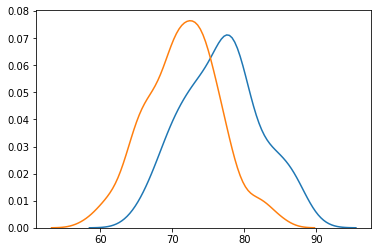

median 77.0
median 72.0
median diff 5.0


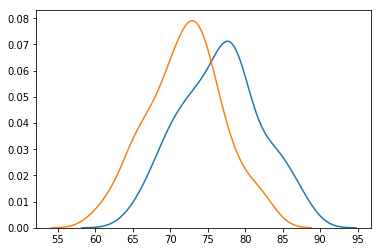

median 77.0
median 71.0
median diff 6.0


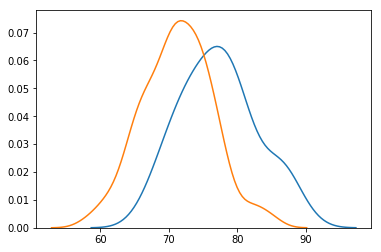

In [107]:
wifi_index = df[df.wifi_name=="b_52025240"].wifi_rank.values[0]
wifi_index = 23
print wifi_index
wifi_sig_kde(ptrain,ptrain1,wifi_index)
wifi_sig_kde(ptrain[ptrain.dayofyear < 237],ptrain1[ptrain1.dayofyear < 237],wifi_index)
wifi_sig_kde(ptrain[ptrain.dayofyear >= 237],ptrain1[ptrain1.dayofyear >= 237],wifi_index)

In [98]:
def wifi_sig_kde(ptrain,ptrain1, wifi_index):
    medians = {}
    _wifi_index = wifi_index
    _p = ptrain
    l = []
    for _i in train_matrix[_p.index][:,_wifi_index]:
        if _i != -115:
            l.append(-_i)
    l2 = np.bincount(l)
    # print len(l)
    # print "bincount",l2
    # print "",np.argmax(l2)
    # print np.sum(l2)
    median1 = np.median(l)
    print "median", median1
    # print np.std(l)
    medians[_d] = np.median(l)
    ses.kdeplot(l)
    _p = ptrain1
    l = []
    for _i in train_matrix[_p.index][:,_wifi_index]:
        if _i != -115:
            l.append(-_i)
    l2 = np.bincount(l)
    # print len(l)
    # print "bincount",l2
    # print "",np.argmax(l2)
    # print np.sum(l2)
    median2 = np.median(l)
    print "median", median2
    # print np.std(l)
    medians[_d] = np.median(l)
    ses.kdeplot(l)
    print "median diff", abs(median1 - median2)
    plt.show()


In [186]:
train_times = train[["weekday","hour","is_weekend"]].values


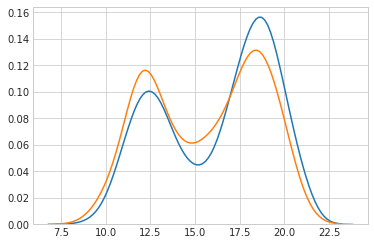

In [191]:
medians = {}
c = 1
_p = ptrain
l = []
l = train_times[_p.index][:,c]
ses.kdeplot(l)
_p = ptrain1
l2 = train_times[_p.index][:,c]
ses.kdeplot(l2)
plt.show()

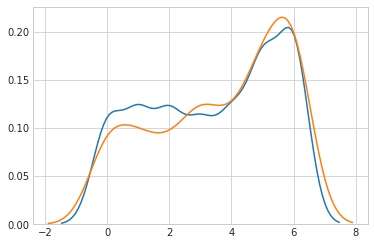

In [192]:
medians = {}
c = 0
_p = ptrain
l = []
l = train_times[_p.index][:,c]
ses.kdeplot(l)
_p = ptrain1
l2 = train_times[_p.index][:,c]
ses.kdeplot(l2)
plt.show()

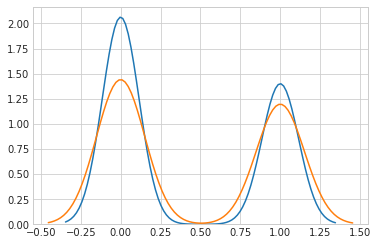

In [193]:
medians = {}
c = 2
_p = ptrain
l = []
l = train_times[_p.index][:,c]
ses.kdeplot(l)
_p = ptrain1
l2 = train_times[_p.index][:,c]
ses.kdeplot(l2)
plt.show()

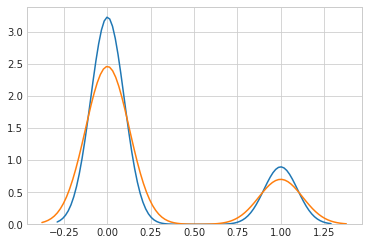

In [197]:
# 是否连接wifi
train_connect_wifi = (train.basic_wifi_info.map(lambda x: len(x[1])).values > 0).astype(int).reshape(-1,1)
medians = {}
c = 0
_p = ptrain
l = []
l = train_connect_wifi[_p.index][:,c]
ses.kdeplot(l)
_p = ptrain1
l2 = train_connect_wifi[_p.index][:,c]
ses.kdeplot(l2)
plt.show()

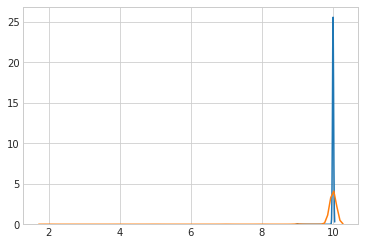

In [209]:
# 搜到的wifi数量
train_search_wifi_size = train.basic_wifi_info.map(lambda x: x[0]).values.reshape(-1,1)
medians = {}
c = 0
_p = ptrain
l = []
l = train_search_wifi_size[_p.index][:,c]
_p = ptrain1
l2 = train_search_wifi_size[_p.index][:,c]

ses.kdeplot(l2)
ses.kdeplot(l)
plt.show()

1090
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3  1  7  8 10 26 22 29 45 53 48 66 69
 51 56 62 54 32 50 30 31 25 17 19 22 20 14 15 22 15 12 17 24 24 17  6  9 16
  6  5  9  4  8  2  1  2  2  1  2  0  0  0  1]
 49
1090
median 52.0
9.64253026265


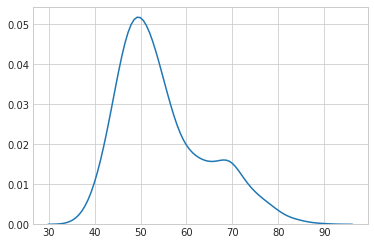

In [146]:
medians = {}
_wifi_index = 2
# for _d in sorted(ptrain.dayofyear.unique())[:]:
#     print _d
_p = ptrain
l = []
for _i in train_matrix[_p.index][:,_wifi_index]:
    if _i != -115:
        l.append(-_i)
print len(l)
l2 = np.bincount(l)
print "bincount",l2
print "",np.argmax(l2)
print np.sum(l2)
print "median",np.median(l)
print np.std(l)
medians[_d] = np.median(l)
ses.kdeplot(l)
plt.show()

In [ ]:
medians = {}
_wifi_index = 8
for _d in sorted(ptrain.dayofyear.unique())[:]:
    print _d
    _p = ptrain[ptrain.dayofyear == _d]
    l = []
    for _i in train_matrix[_p.index][:,_wifi_index]:
        if _i != -115:
            l.append(-_i)
    print len(l)
#     if len(l) == 0 or np.unique(l).shape[0]<2:
#         continue
    l2 = np.bincount(l)
    print "bincount",l2
    print "",np.argmax(l2)
    print np.sum(l2)
    print "median",np.median(l)
    print np.std(l)
    medians[_d] = np.median(l)
    ses.kdeplot(l)
    
    _p = ptrain1[ptrain1.dayofyear == _d]
    l = []
    for _i in train_matrix[_p.index][:,_wifi_index]:
        if _i != -115:
            l.append(-_i)
    print len(l)
#     if len(l) == 0 or np.unique(l).shape[0]<2:
#         continue
    l2 = np.bincount(l)
    print "bincount",l2
    print "",np.argmax(l2)
    print np.sum(l2)
    print "median",np.median(l)
    print np.std(l)
    medians[_d] = np.median(l)
    ses.kdeplot(l)
    plt.show()

In [177]:
ptrain.shape

(1405, 23)

In [131]:
(train_matrix[ptrain.index,0] == -115)

82

213
103
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  1  4  1  7  6  4  4  3  8  4  9 13  5  4  6  7  0  2  4  1
  3  2  2  0  2]
 41
103
median 40.0
5.726772912


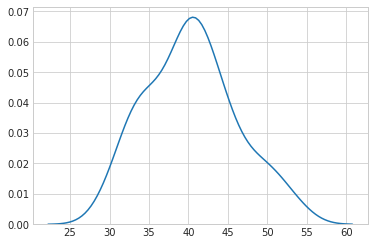

214
78
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 2 5 1 5 8 2 8
 4 9 0 3 0 3 4 6 0 2 0 2 3 1 0 1 2 1 1 0 0 0 1 0 0 1]
 38
78
median 38.0
7.57508980381


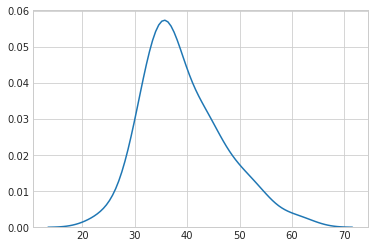

215
99
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
  0  1  1  1  1  0  1  2  4  7  3  3  5 10  7  8  8  6  7  5  4  2  2  2  2
  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  0  0  0  0  1  0  0  0  1  1]
 38
99
median 40.0
10.0994241179


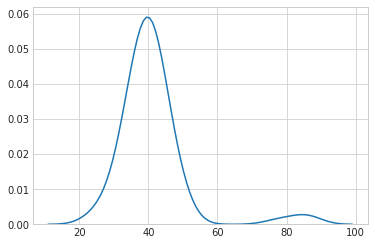

216
88
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  1  1  1  0  3  3  5  2  3  5  8  3  7  5  7 10  5  2  1  3  1  3  2
  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 42
88
median 40.0
7.82543763463


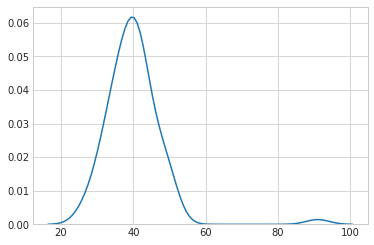

217
82
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 1 1 5 0 5 4 4 5
 6 5 3 5 7 6 1 3 3 3 2 3 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1]
 41
82
median 38.5
7.05629821067


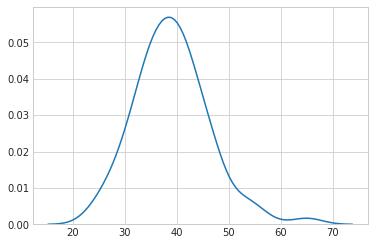

218
81
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 2 1 2 1 6 7 5 2 7
 3 8 1 5 1 6 3 2 2 4 2 1 1 0 1 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]
 38
81
median 38.0
8.738927063


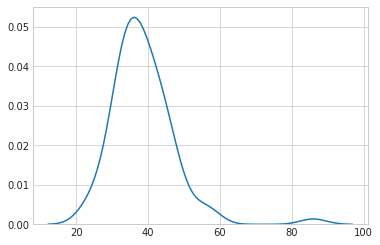

219
100
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
  0  0  2  2  0  2  2  1  3  3  6  6  6  6  8  9  7  3  6 10  2  5  2  1  2
  0  0  2  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 44
100
median 40.0
8.01285841632


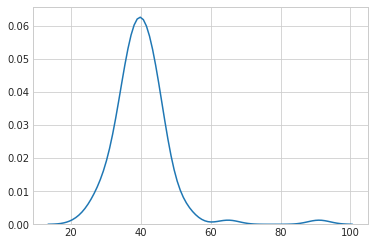

220
78
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 4 0 8 3 4 9
 3 6 2 6 9 3 5 0 0 4 1 0 1 1 1 0 1 0 0 0 1 0 1]
 36
78
median 38.0
6.27641034021


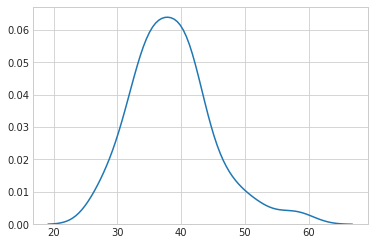

221
83
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 5 2 6 6 2 7
 5 9 5 7 2 1 7 1 2 2 4 2 0 0 1 0 0 0 0 0 0 1]
 38
83
median 38.0
6.09009628443


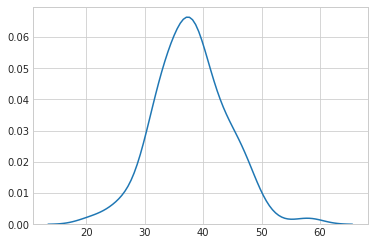

222
89
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 4 2 1 1 2 5 8 5
 7 2 4 9 9 4 5 2 2 2 2 1 2 3 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 1]
 40
89
median 40.0
9.89361413011


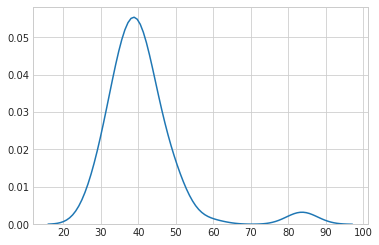

223
100
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  3  3  4  4  4  3  6  4  9  5  2  8  6  5  6 10  5  2  1  2  1
  2  1  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1]
 44
100
median 40.0
7.47509866156


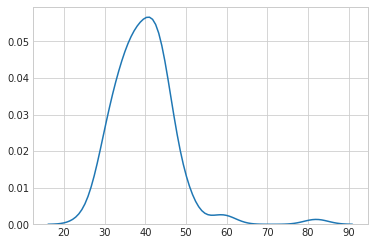

224
90
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 2 2 3 8 2 4
 6 3 9 8 5 3 7 6 2 2 2 1 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 39
90
median 39.0
9.72561845442


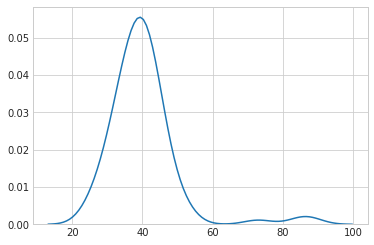

225
77
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  2  3  0  0  1  1  3  4  0  6 10  5  2  8  5  5  3  2  1  4  1  1  0  1
  1  0  2  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  0  0  1  0  0  0  1]
 36
77
median 39.0
10.0218684818


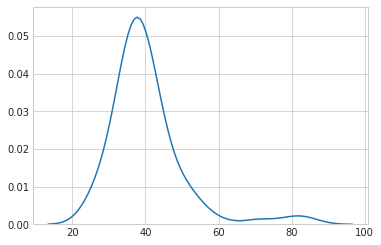

226
71
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 1 1 2 2 0 5 5 4
 6 2 7 1 5 5 3 4 2 0 3 1 0 3 1 1 1 0 0 0 0 0 0 0 0 2]
 39
71
median 39.0
7.24414819005


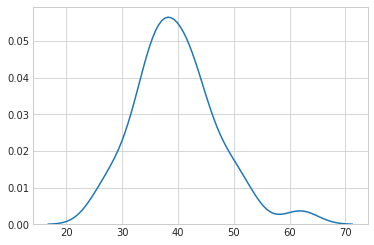

227
87
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 2 4 5 7 8 8 6
 2 2 9 7 3 1 1 3 3 1 3 0 2 2 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1]
 39
87
median 37.0
8.1155448964


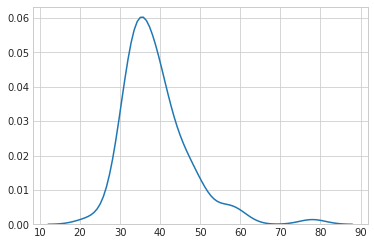

228
100
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 1 5 4 7 5 2 9
 6 9 8 8 8 6 2 3 3 2 0 2 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 36
100
median 38.0
9.00819626784


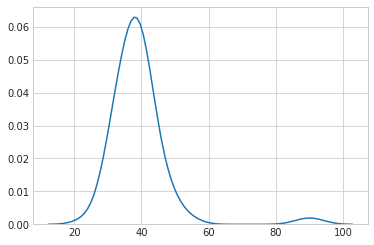

229
101
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  1  1  1  5  4  2 11  6  3 11  7  6  5  5  4  7  4  4  4  3  1  1
  0  1  1  2]
 34
101
median 38.0
5.75851321639


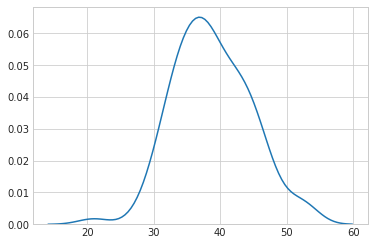

230
85
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 3 1 3 3 4 5 1
 7 4 5 5 5 4 7 6 2 2 2 0 1 1 0 2 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
 37
85
median 40.0
11.3293201389


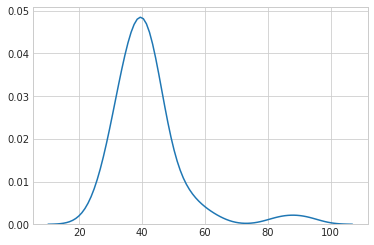

231
100
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0  0  1  2  0  0  2  5  4  6  5  8  7  9  4 10  6  4  4  9  1  3  4  1
  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1]
 41
100
median 39.5
9.1360549473


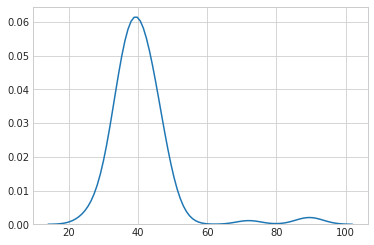

232
78
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 2 0 2 2 4 0 4
 4 5 4 6 0 6 1 6 6 3 3 2 3 0 3 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1]
 40
78
median 42.0
13.2914344146


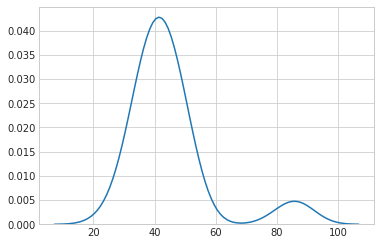

233
124
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  0  0  3  4  5  3 10  7  6  6 11  8  5  6  6  4  5  8  4  6  4
  2  3  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  1  0  1  0  0  0  1]
 39
124
median 40.0
8.81357903114


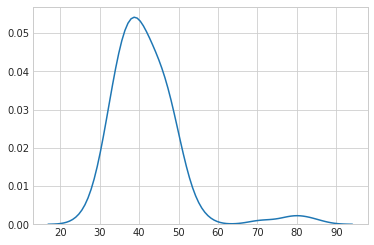

234
105
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  0  1  3  4  3  1  5  4  7 10  4  3  8  6  6  3  4  3  6  1  3  3
  2  3  0  0  4  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
  0  0  0  0  0  0  0  0  0  1  0  1  0  0  1  0  0  0  1]
 37
105
median 40.0
11.8109676537


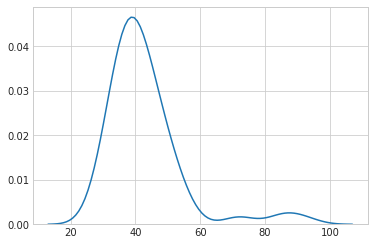

235
83
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 5 5 6 6
 8 6 4 8 6 3 0 4 1 0 2 1 2 2 2 1 1 2 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1]
 37
83
median 39.0
8.33118373591


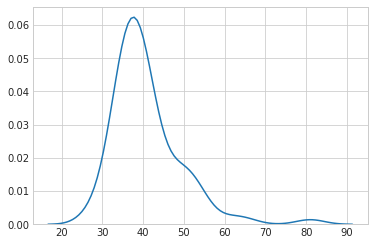

236
79
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 1 1 2 5 6 0 7 5
 8 5 4 3 1 2 3 1 2 0 1 2 4 2 2 0 2 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1]
 37
79
median 38.0
12.3029249052


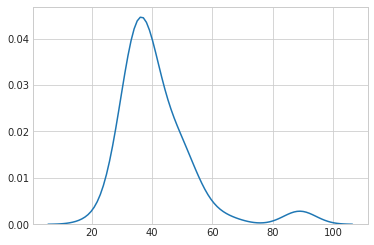

237
70
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 2 4 4 1
 5 6 4 6 4 3 4 2 3 4 1 4 2 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1]
 38
70
median 40.0
11.7578979101


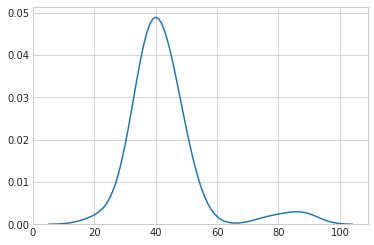

238
88
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 2 5 1 0 5 2 6 8
 6 8 5 7 5 2 5 3 5 1 0 1 0 2 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 36
88
median 38.0
8.24996869516


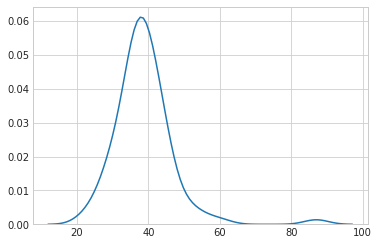

239
98
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 3 4 3 8 5 7
 2 6 6 3 6 7 6 4 3 1 1 2 2 2 1 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 2 0 0 0 0 1 1 0 0 0 0 1]
 34
98
median 39.0
12.1344723237


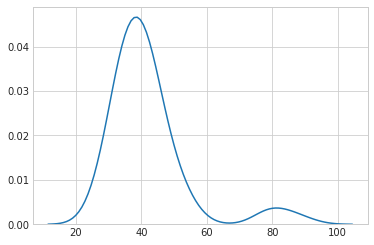

240
116
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  1  0  0  3  2  2  3  6 11  7  9  7  7 12  4  7  5  2  5  2  4  1  6  1
  1  1  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  2  0  0  1  0  0  1]
 39
116
median 38.0
10.1059929713


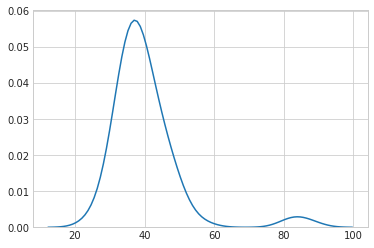

241
90
bincount [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 3 4 8 3 3
 7 5 6 4 8 6 4 2 5 4 4 1 1 0 1 3 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1]
 34
90
median 40.0
8.03203462685


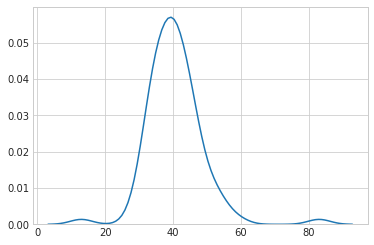

242
114
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0
  1  1  1  2  3  4  4  5  5  4  7  8  4 11  5 10  9  6  3  4  0  2  1  2  1
  0  1  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  1  1  0  0  1  0  0  0  1]
 38
114
median 38.0
10.6104278342


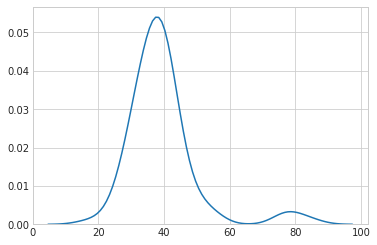

243
127
bincount [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0
  1  1  0  2  1  1  2  4  6  5 13  8  9  8  5  9  9  4  7  3  2  2  4  4  3
  2  3  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  0  0  0  0  1  0  0  0  1  0  0  0  0  0  1]
 35
127
median 39.0
10.0169860078


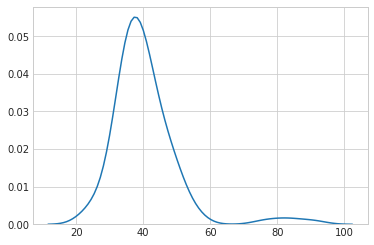

In [134]:
medians = {}
_wifi_index = 0
for _d in sorted(train.dayofyear.unique())[:]:
    print _d
    _p = train[train.dayofyear == _d]
    l = []
    for _i in train_matrix[_p.index][:,_wifi_index]:
        if _i != -115:
            l.append(-_i)
    print len(l)
    l2 = np.bincount(l)
    print "bincount",l2
    print "",np.argmax(l2)
    print np.sum(l2)
    print "median",np.median(l)
    print np.std(l)
    medians[_d] = np.median(l)
    ses.kdeplot(l)
    plt.show()

In [108]:
np.median(medians.values())

39.0